In [193]:
import cv2 as cv
import numpy as np
from rembg import remove
import matplotlib.pyplot as plt
%matplotlib inline

## Template

## Foreground

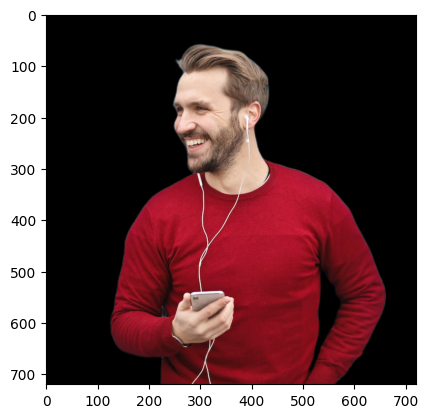

In [194]:
path = "./../Data/Input/happy_bro.jpg"
dim = 720
img = cv.imread(path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

h, w, _ = rgb.shape
dim_2 = min(h, w)//2
rgb_crop = rgb[h//2-dim_2:h//2+dim_2, w//2-dim_2:w//2+dim_2]
rgb_crop = cv.resize(rgb_crop, (dim, dim), interpolation=cv.INTER_LINEAR)

fg = remove(rgb_crop)
fg = cv.cvtColor(fg, cv.COLOR_RGBA2RGB)

fg = remove(fg)
fg = cv.cvtColor(fg, cv.COLOR_RGBA2RGB)

plt.imshow(fg)

## Background
- Color + Pattern

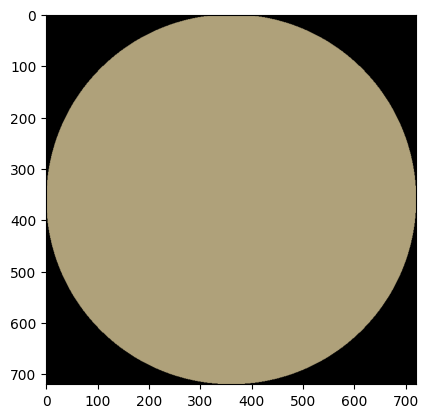

In [137]:
bg_color = [np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255)]
bg = (np.ones((dim, dim, 3)) * (0, 0, 0)).astype(np.uint8)
cv.circle(bg, (dim//2, dim//2), dim//2, bg_color, -1)
plt.imshow(bg)

In [ ]:
bg_grey = cv.cvtColor(bg, cv.COLOR_RGB2GRAY)
_, bg_mask = cv.threshold(bg_grey, 1, 255, cv.THRESH_BINARY)
# plt.imshow(bg_mask)

fg_grey = cv.cvtColor(fg, cv.COLOR_RGB2GRAY)
_, fg_mask = cv.threshold(fg_grey, 1, 255, cv.THRESH_BINARY)
# plt.imshow(fg_mask)

(720, 720)

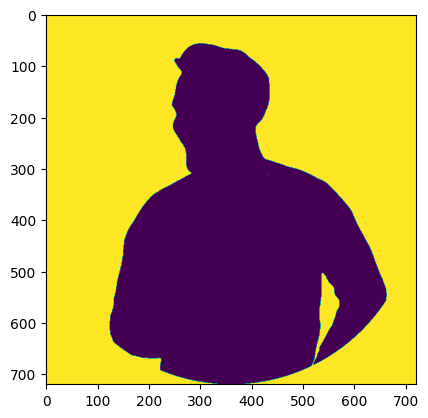

In [197]:
base_mask = cv.bitwise_and(bg, bg, mask=fg_mask)
base_mask = cv.cvtColor(base_mask, cv.COLOR_RGB2GRAY)
base_mask_inv = cv.bitwise_not(base_mask)
plt.imshow(base_mask)
plt.imshow(base_mask_inv)

base_mask.shape

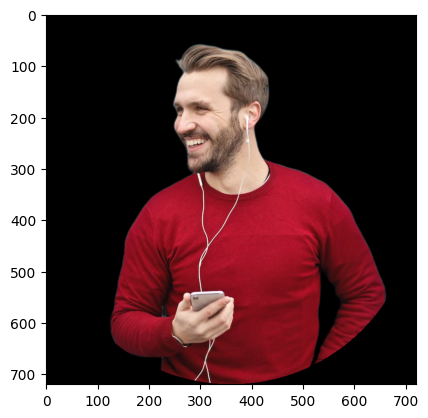

In [147]:
fg = cv.bitwise_and(fg, fg, mask=base_mask)
# pic += bg
plt.imshow(fg)

(720, 720, 3)

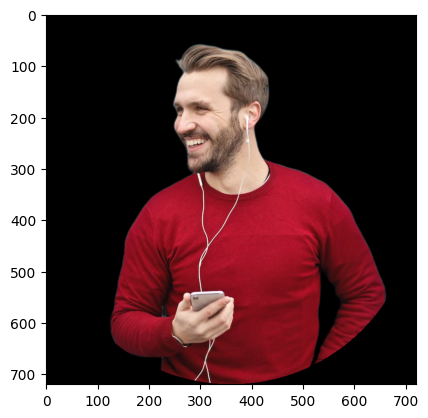

In [200]:
base_mask_inv = cv.bitwise_not(base_mask)
pic = cv.bitwise_and(fg, fg, mask=base_mask)
# pic = cv.cvtColor(pic, cv.COLOR_RGB2BGR)
# pic += fg
plt.imshow(pic)
pic.shape